# Descriptive Statistics

In descriptive statistics, the data is summarised using specific values, such as mean, median, etc., to make the data easier to grasp. It doesn't make any inferences or generalisations beyond what is already true. This indicates that there is no basis for the descriptive statistics, which are simply a representation of the data (sample) that is available.

Importing Libraries and data

In [107]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import statistics as st 
import seaborn as sns 

In [3]:
data=pd.read_csv('data.csv')
data.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


# MEAN

The ratio of the total number of observations to the sum of all the observations in the data is known as the mean. This also goes by the name "Average." Thus, the mean is a value that the entire data set is distributed around.

With Inbuilt Function

In [6]:
data.describe().iloc[1,:]

Mthly_HH_Income           41558.00
Mthly_HH_Expense          18818.00
No_of_Fly_Members             4.06
Emi_or_Rent_Amt            3060.00
Annual_HH_Income         490019.04
No_of_Earning_Members         1.46
Name: mean, dtype: float64

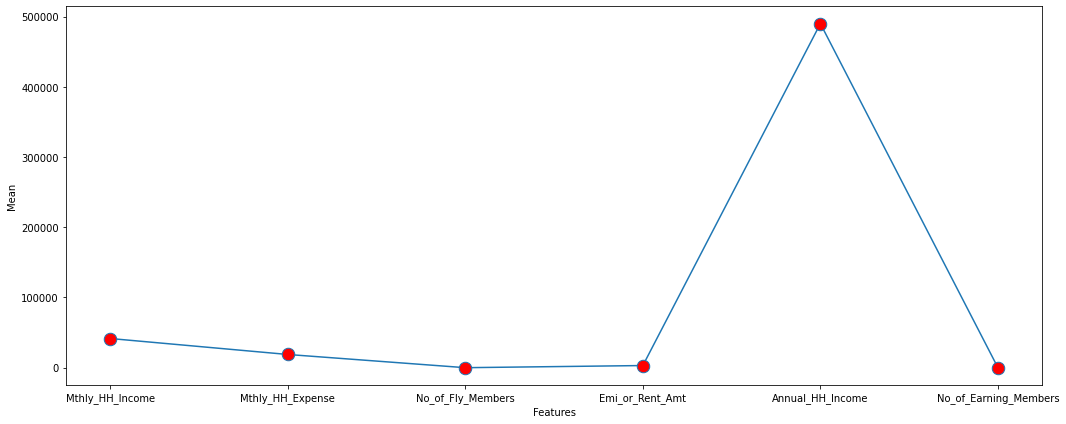

In [22]:
plt.figure(figsize=(15,6))
plt.plot(data.describe().iloc[1,:],marker='.', markersize=25, markerfacecolor='r')
plt.xlabel('Features')
plt.ylabel('Mean')
plt.tight_layout()

With function

In [72]:
def find_mean(dataframe, col_name):
    if(dataframe[col_name].dtype!='O'):
        sum=0
        for i in dataframe[col_name]:
            sum = sum + float(i)
        n= len(dataframe[col_name])
        return sum /n


In [76]:
for x in data.columns:
    print(x)
    print('Mean :' ,find_mean(data,x))
    print('-----')

Mthly_HH_Income
Mean : 41558.0
-----
Mthly_HH_Expense
Mean : 18818.0
-----
No_of_Fly_Members
Mean : 4.06
-----
Emi_or_Rent_Amt
Mean : 3060.0
-----
Annual_HH_Income
Mean : 490019.04
-----
Highest_Qualified_Member
Mean : None
-----
No_of_Earning_Members
Mean : 1.46
-----


# Median

The median is the point at which all the data are divided into two equally sized halves. The median is exceeded by one-half of the data, while the other half is less than it. The data are first arranged in either ascending or descending order before the median is determined.

The middle observation in the sorted form provides the median if the number of observations is odd.
The median is determined by the mean of the two middle observations in the sorted form if the number of observations is even.

With Inbuilt Function

In [33]:
data.median()

C:\Users\Aditya Mehrotra\AppData\Local\Temp\ipykernel_684\4184645713.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.median()


Mthly_HH_Income           35000.0
Mthly_HH_Expense          15500.0
No_of_Fly_Members             4.0
Emi_or_Rent_Amt               0.0
Annual_HH_Income         447420.0
No_of_Earning_Members         1.0
dtype: float64

C:\Users\Aditya Mehrotra\AppData\Local\Temp\ipykernel_684\2657197589.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plt.plot(data.median(),marker='.', markersize=25, markerfacecolor='r' , ls='--')


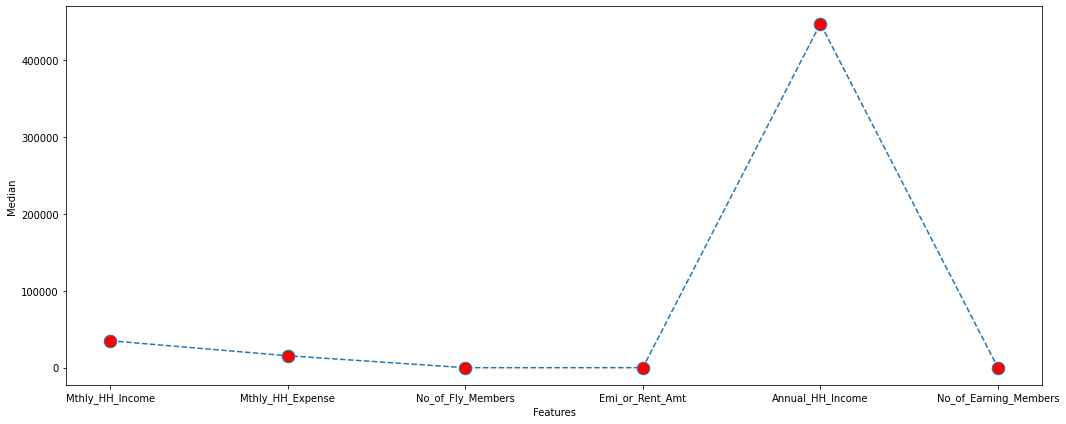

In [35]:
plt.figure(figsize=(15,6))
plt.plot(data.median(),marker='.', markersize=25, markerfacecolor='r' , ls='--')
plt.xlabel('Features')
plt.ylabel('Median')
plt.tight_layout()

With Function

In [80]:
def find_median(dataframe, col_name):
    if(dataframe[col_name].dtype!='O'):
        dataframe[col_name].sort_values()
        n= len(dataframe[col_name])
        if(n%2==0):
            return (dataframe[col_name][n-1] + dataframe[col_name][n])/2

        else:
            return dataframe[col_name][n]/2

In [81]:
for x in data.columns:
    print(x)
    print('Median :' ,find_median(data,x))
    print('-----')

Mthly_HH_Income


KeyError: 50

# Mode

# Variance

Variance is a measurement of how widely apart data points are from the mean. A large variance suggests that the data points are widely dispersed, whereas a low variance suggests that the data points are more closely related to the data set mean.

In [91]:
data.describe()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000
mean,41558.000000,18818.000000,4.060000,3060.000000,4.900190e+05,1.460000
std,26097.908979,12090.216824,1.517382,6241.434948,3.201358e+05,0.734291
min,5000.000000,2000.000000,1.000000,0.000000,6.420000e+04,1.000000
25%,23550.000000,10000.000000,3.000000,0.000000,2.587500e+05,1.000000
50%,35000.000000,15500.000000,4.000000,0.000000,4.474200e+05,1.000000
75%,50375.000000,25000.000000,5.000000,3500.000000,5.947200e+05,2.000000
max,100000.000000,50000.000000,7.000000,35000.000000,1.404000e+06,4.000000


With Function

In [98]:
def find_var(dataframe,col_name):
    if(dataframe[col_name].dtype!='O'):
        sum=0
        mean= find_mean(dataframe, col_name)
        for i in dataframe[col_name]:
            sum = sum + pow( (i - mean) , 2)
        n = len(dataframe[col_name])
        return sum /n


In [99]:
find_var(data,'Mthly_HH_Income')

667478836.0

In [100]:
for x in data.columns:
    print(x)
    print('Variance :' ,find_var(data,x))
    print('-----')

Mthly_HH_Income
Variance : 667478836.0
-----
Mthly_HH_Expense
Variance : 143249876.0
-----
No_of_Fly_Members
Variance : 2.2564
-----
Emi_or_Rent_Amt
Variance : 38176400.0
-----
Annual_HH_Income
Variance : 100437186889.95831
-----
Highest_Qualified_Member
Variance : None
-----
No_of_Earning_Members
Variance : 0.5284
-----


In [97]:
np.sqrt(find_var(data,'Mthly_HH_Expense'))

11968.704023410388

In [94]:
find_mean(data, 'Mthly_HH_Expense')

18818.0

# Standard Deviation

The square root of Variance is called the Standard Deviation.

In [82]:
data.describe()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000
mean,41558.000000,18818.000000,4.060000,3060.000000,4.900190e+05,1.460000
std,26097.908979,12090.216824,1.517382,6241.434948,3.201358e+05,0.734291
min,5000.000000,2000.000000,1.000000,0.000000,6.420000e+04,1.000000
25%,23550.000000,10000.000000,3.000000,0.000000,2.587500e+05,1.000000
50%,35000.000000,15500.000000,4.000000,0.000000,4.474200e+05,1.000000
75%,50375.000000,25000.000000,5.000000,3500.000000,5.947200e+05,2.000000
max,100000.000000,50000.000000,7.000000,35000.000000,1.404000e+06,4.000000


With Inbuilt Function

In [85]:
data.std()

C:\Users\Aditya Mehrotra\AppData\Local\Temp\ipykernel_684\2723740006.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.std()


Mthly_HH_Income           26097.908979
Mthly_HH_Expense          12090.216824
No_of_Fly_Members             1.517382
Emi_or_Rent_Amt            6241.434948
Annual_HH_Income         320135.792123
No_of_Earning_Members         0.734291
dtype: float64

C:\Users\Aditya Mehrotra\AppData\Local\Temp\ipykernel_684\3978571309.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plt.plot(data.std(),marker='*', markersize=15, markerfacecolor='r')


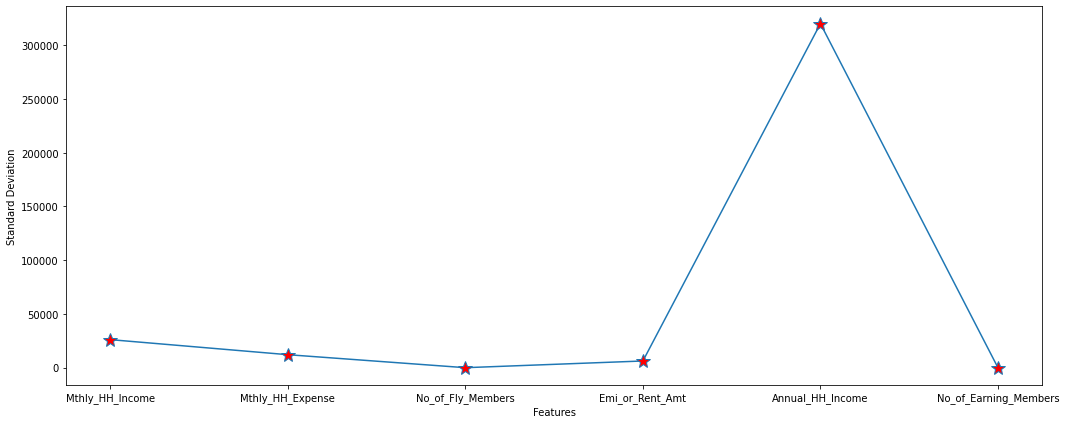

In [88]:
plt.figure(figsize=(15,6))
plt.plot(data.std(),marker='*', markersize=15, markerfacecolor='r')
plt.xlabel('Features')
plt.ylabel('Standard Deviation')
plt.tight_layout()

With Function

In [101]:
def find_std(dataframe,col_name):
    if(dataframe[col_name].dtype!='O'):
        var= find_var(dataframe,col_name)
        return np.sqrt(var)

In [106]:
for x in data.columns:
    print(x , '   Standard Deviation  : ' , find_std(data,x))
    

Mthly_HH_Income    Standard Deviation  :  25835.611779092826
Mthly_HH_Expense    Standard Deviation  :  11968.704023410388
No_of_Fly_Members    Standard Deviation  :  1.502131818450032
Emi_or_Rent_Amt    Standard Deviation  :  6178.705366013175
Annual_HH_Income    Standard Deviation  :  316918.26531451027
Highest_Qualified_Member    Standard Deviation  :  None
No_of_Earning_Members    Standard Deviation  :  0.72691127381545


# Correlation

A statistical approach called correlation shows how one variable changes or moves in connection to another variable. It provides us with a general understanding of how closely the two variables are related. This bi-variate analysis measure explains the relationship between many variables. In the majority of business situations, it is helpful to discuss a subject in terms of how it relates to other issues.

<AxesSubplot:>

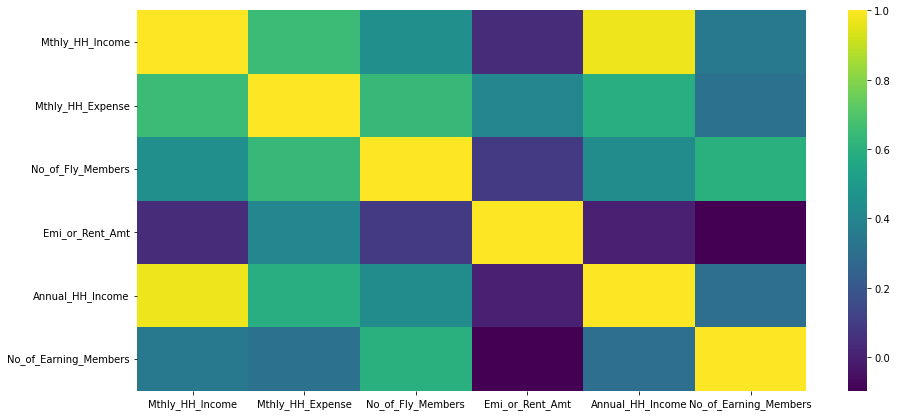

In [111]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),cmap='viridis')

# Normal Distribution 

A probability distribution that is symmetric about the mean is the normal distribution, sometimes referred to as the Gaussian distribution. It demonstrates that data that are close to the mean occur more frequently than data that are far from the mean. The normal distribution appears as a "bell curve" on a graph.

sns.kdeplot()

In [117]:
plt.figure(figsize=(15,10))
colors=['red','green','blue','pink','orange']

for x in data.columns:
    if data[x].dtype!='O':
        sns.kdeplot(data[x],shade=True, color=np.random.choice(colors))


c:\Users\Aditya Mehrotra\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret value `Mthly_HH_Income` for parameter `x`

<Figure size 1080x720 with 0 Axes>